In [9]:
import pandas as pd
import random
import numpy as np
from utils import get_character_label

In [12]:
df = pd.read_csv("data/all_lines.csv")
print(len(df))

51292


In [14]:
df["cur_speaker_label"] = df["speaker"].apply(lambda x:get_character_label(x))
df["next_speaker_label"] = df["next_speaker"].apply(lambda x:get_character_label(x))
df.head()

,Unnamed: 0,speaker,next_speaker,raw_line,processed_line,location,cur_speaker_label,next_speaker_label
0,0,Sheldon,Leonard,So if a photon is directed through a plane wi...,"['So', 'photon', 'directed', 'plane', 'slits',...","['A', 'corridor', 'sperm', 'bank', '.']",Sheldon,Leonard
1,1,Leonard,Sheldon,"Agreed, what’s your point?","['Agreed', ',', '’', 'point', '?']","['A', 'corridor', 'sperm', 'bank', '.']",Leonard,Sheldon
2,2,Sheldon,Leonard,"There’s no point, I just think it’s a good id...","['There', '’', 'point', ',', 'I', '’', 'idea',...","['A', 'corridor', 'sperm', 'bank', '.']",Sheldon,Leonard
3,3,Leonard,Receptionist,Excuse me?,"['Excuse', '?']","['A', 'corridor', 'sperm', 'bank', '.']",Leonard,Secondary
4,4,Receptionist,Leonard,Hang on.,"['Hang', '.']","['A', 'corridor', 'sperm', 'bank', '.']",Secondary,Leonard


In [38]:
df_freq_cur = df["cur_speaker_label"].value_counts().to_frame()
df_freq_next = df["next_speaker_label"].value_counts().to_frame()
df_freq = pd.merge(df_freq_cur, df_freq_next, left_index=True, right_index=True)
df_freq.head()

,cur_speaker_label,next_speaker_label
Sheldon,11689,11066
Leonard,9829,9323
Penny,7677,7274
Howard,5872,5526
Secondary,5284,5047


array([<AxesSubplot:ylabel='cur_speaker_label'>,
       <AxesSubplot:ylabel='next_speaker_label'>], dtype=object)

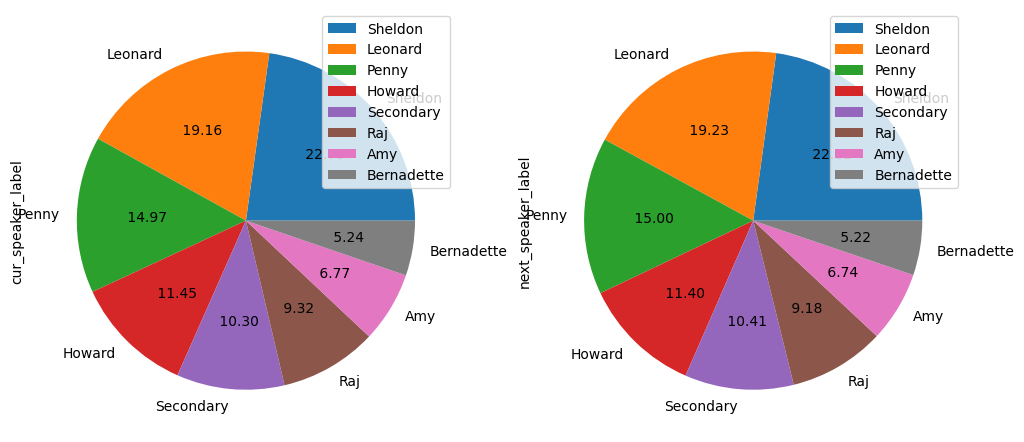

In [40]:
df_freq.plot.pie(subplots=True, figsize=(12, 8), autopct = '% .2f')

In [41]:
df.to_csv("data/processed_lines.csv")
df_freq.to_csv("data/meta_data.csv")